# Video Game Sales Exploratory Analysis

Data available at: https://www.kaggle.com/gregorut/videogamesales


This notebook still is a work in progress.

In this notebook i'm trying to think as a decision taker of a game dev studio, just analyzing the data to gather knowledge and aid in a decision

You can contact-me on my <a href='https://www.linkedin.com/in/ramonrcn/'>LinkedIn profile</a>

In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading and basic pre-processing

In [2]:
#reading the data

vg = pd.read_csv('vgsales.csv')
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
vg.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


One thing wrong here: Max year 2020. The dataset has registers up to 2017. We'll address it later

In [6]:
# Checking for NaN's
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Deleting the entries with NaN's
vg.dropna(subset = ['Year','Publisher'], how = 'any', axis = 0, inplace = True)

# Setting the year as int
vg.Year = vg.Year.astype(int)

#Checking the Df info again
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null int32
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# Fixing one registry, the game came out in 2009, and the data go up to early 2017
## After a quick filter and google search, i found out that the game came out in '09
## vg.loc[vg.Year == 2020]

vg.Year.replace(2020, 2009, inplace= True)

## Which Platform choose? and what genre?

If i was representing a game development studio, I wonder what platform has the biggest marketshare, and what genres could perform better in each platform. So let's get to it.

In [9]:
# Consolidating the data in another DataFrame

'''This dataframe contains all the sales data ordered by platform and global sales. It already meets my specification of knowing
what genre does best at each platform. But its tedious to read and takes too long to absorb the information'''

cons = vg.groupby(['Platform','Genre'], as_index = True).sum()
cons.drop(['Rank','Year'], axis= 1, inplace = True)
cons.sort_values(by = ['Platform','Global_Sales'], ascending = False, inplace = True)
cons.head(24)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Genre                                                                
XOne     Shooter          31.78     15.27      0.16         4.38         51.61
         Action           19.45     11.47      0.05         2.81         33.79
         Sports           14.26      7.67      0.02         2.03         23.97
         Role-Playing      5.56      3.06      0.01         0.83          9.48
         Racing            3.94      4.16      0.05         0.68          8.80
         Misc              4.44      1.82      0.01         0.61          6.86
         Adventure         1.20      1.08      0.03         0.20          2.51
         Fighting          1.58      0.52      0.01         0.23          2.31
         Platform          0.44      0.29      0.00         0.07          0.81
         Simulation        0.28      0.21      0.00         0.05          0.54
         Strategy          0.26      0.10      0.00         0.03          0.38
XB       Shooter          45.11     14.94      0.24         1.84         62.12
         Sports           39.97     10.78      0.16         1.98         53.05
         Action           33.19     12.21      0.33         1.71         47.46
         Racing           21.43      8.66      0.17         1.06         31.42
         Role-Playing      9.89      3.04      0.08         0.50         13.51
         Fighting          9.45      2.59      0.36         0.40         12.83
         Platform          6.58      2.70      0.01         0.34          9.66
         Misc              6.42      1.88      0.00         0.27          8.67
         Simulation        5.43      1.43      0.03         0.22          7.11
         Adventure         2.22      0.73      0.00         0.07          3.06
         Strategy          2.05      0.61      0.00         0.08          2.78
         Puzzle            0.32      0.08      0.00         0.01          0.42
X360     Shooter         173.37     76.29      3.05        24.43        277.23

In [10]:
# Gathering the same data as the above DF, but in a more 'plot friendly shape'

cons2 = vg.groupby(['Platform','Genre'], as_index = False).sum()
cons2.drop(['Rank','Year'], axis= 1, inplace = True)
cons2.sort_values(by = ['Platform','Global_Sales'], ascending = False, inplace = True)

# Filtering the games that sold more than 4 mil. copies, to generate a cleaner plot
cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False)

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
153,PS3,Action,119.82,109.26,28.95,46.00,304.02
244,Wii,Sports,149.94,94.87,18.25,26.90,289.95
266,X360,Shooter,173.37,76.29,3.05,24.43,277.23
141,PS2,Action,127.71,71.34,25.72,47.61,272.43
151,PS2,Sports,128.25,66.55,24.69,43.18,262.64
258,X360,Action,139.62,75.85,2.77,21.36,239.67
237,Wii,Misc,119.46,65.00,13.71,19.13,217.43
161,PS3,Shooter,81.71,75.10,8.80,30.18,195.80
147,PS2,Racing,74.73,46.61,5.88,27.11,154.21
37,DS,Misc,54.98,35.65,37.26,9.75,137.67


In [11]:
# Setting the colors used in the plots below, fell free to try any other color palette

#palette=sns.diverging_palette(128,240,79,32,1,n=12)
#palette= sns.color_palette("YlGnBu", 12)

clrz = ['#d70909',"#f26522",'#0000ff','#FFE00E','#a864a8','#790000','#005826','#00bff3','#636363','#8dc63f','#440e62','#ec008c']

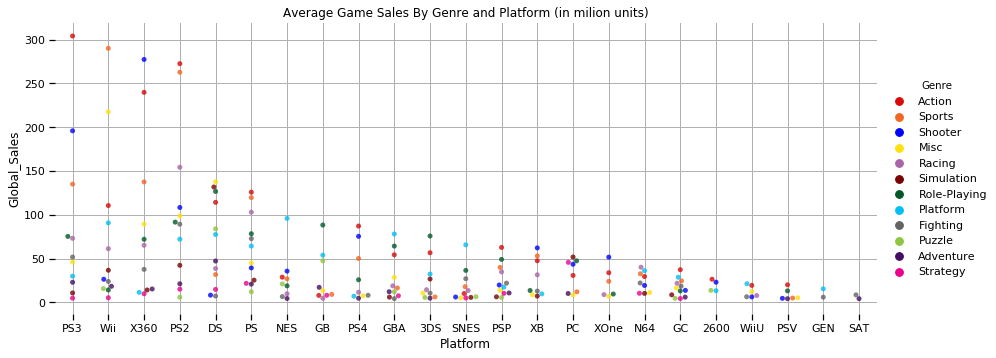

In [12]:
# Ploting all the data from the DF above

with sns.plotting_context('notebook'):
    
    sns.catplot(data = cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False),
                x= 'Platform', y= 'Global_Sales', hue= 'Genre', ci = None, kind= 'swarm', 
                dodge = False, alpha = .8, aspect=2.5, marker = 'o', palette=sns.color_palette(clrz))
    
    sns.despine(left= True, bottom=True)
    plt.title('Average Game Sales By Genre and Platform (in milion units)')
    plt.grid(axis='both',which='major')
    plt.show()


This plot gives a good idea of the average sales number, but is kinda hard to see, so i plotted the graph below

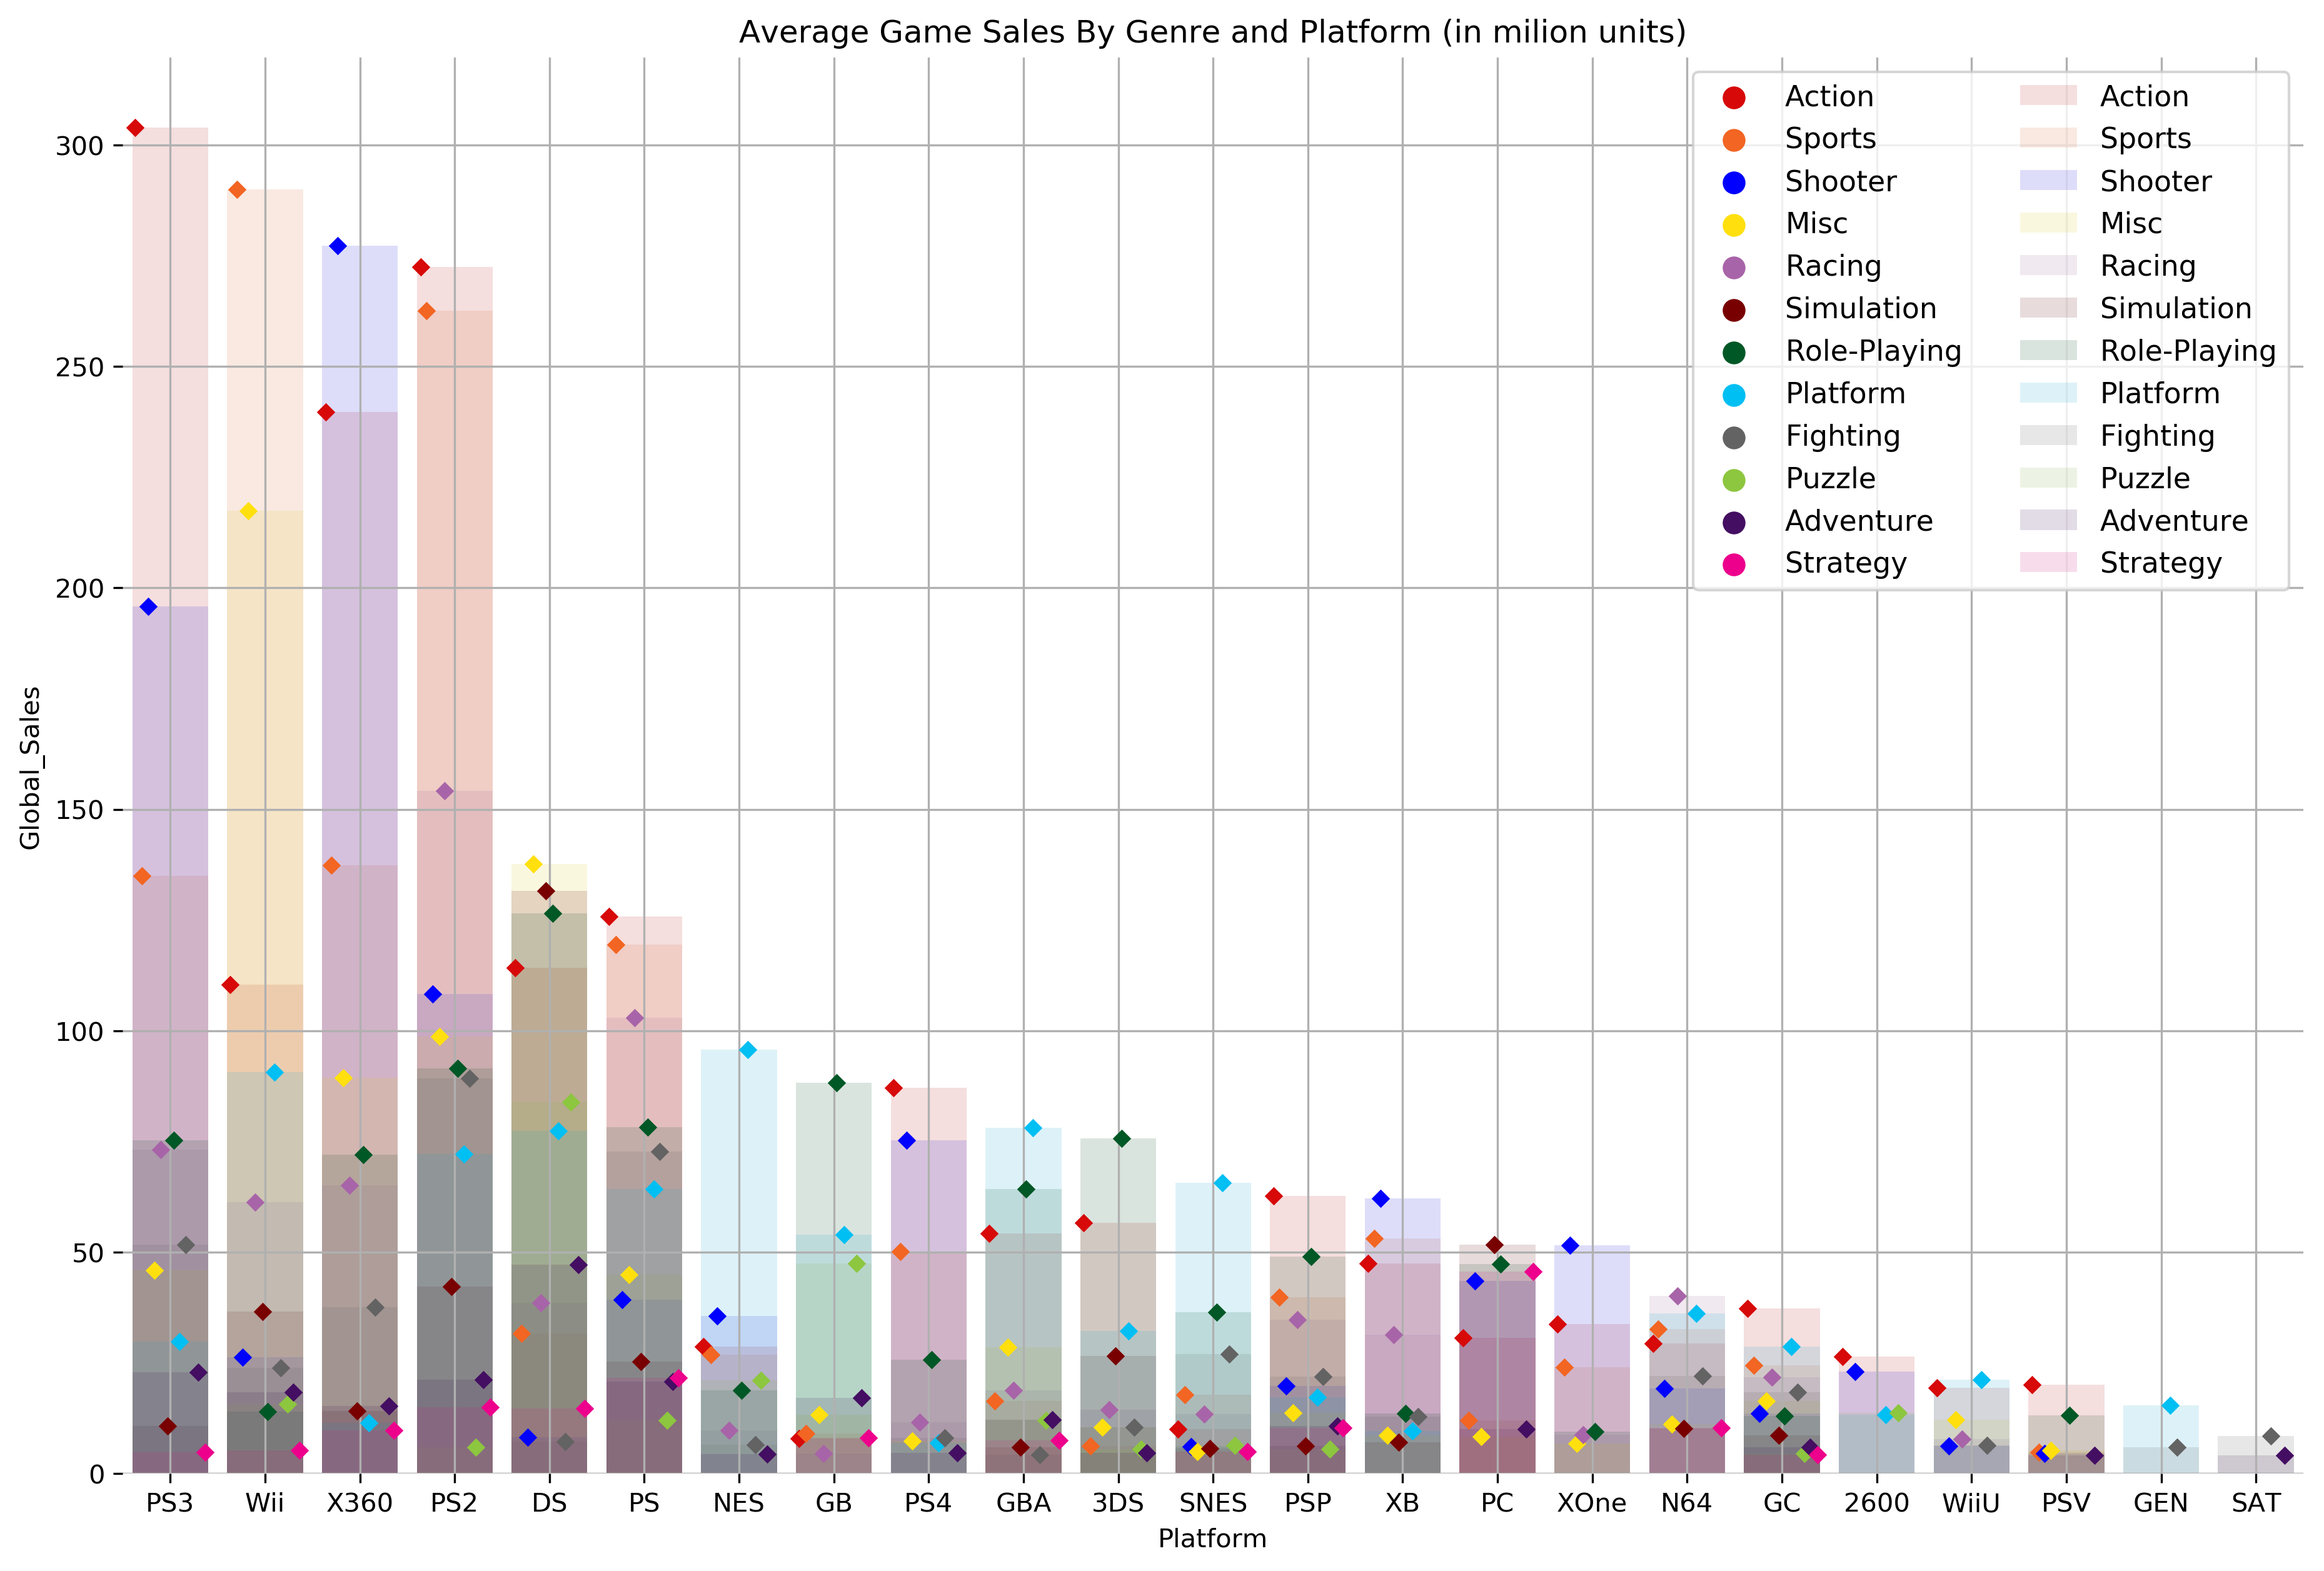

In [13]:
# Plotting a better graph

#This is an overlayed plot
f, ax = plt.subplots(ncols=1,nrows=1,sharey=True,figsize=(15, 10),dpi = 300)

with sns.plotting_context('notebook'):
    
    g = sns.barplot(data=cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False), x='Platform',
                y='Global_Sales', hue ='Genre', ci=None, dodge=False, alpha= .15,palette=sns.color_palette(clrz), ax=ax)
       
    g.set_xticklabels('')
    g.set_xlabel('')  
    
    ax2 = ax # Using the same axis (The ax.twinx method upsets the Y axis, and is a pain to realign later)
    
    g = sns.stripplot(data = cons2.loc[cons2.Global_Sales >= 4].sort_values(by='Global_Sales', ascending=False),
                x= 'Platform', y= 'Global_Sales', hue= 'Genre', palette=sns.color_palette(clrz),  
                dodge = True, alpha = 1, marker = 'D',ax=ax2  )
    sns.despine(left= True, bottom=True)
    plt.title('Average Game Sales By Genre and Platform (in milion units)')
    plt.grid(axis='both',which='major')
    plt.legend(ncol=2, frameon=True, loc='upper right')
    #plt.savefig(dpi=300,fname='D:\GitHub\Python\\Data Science Projects\\Video Game Sales\Avg_Sales_Genre_Platform.png')
    plt.show()


Ok, so we already know what genres do better in which platform. What about the regional preference?
What games and genres did well in each part of the world?

<a id='SalesGenreOverview'></a>

## Sales by Genre and Region overview

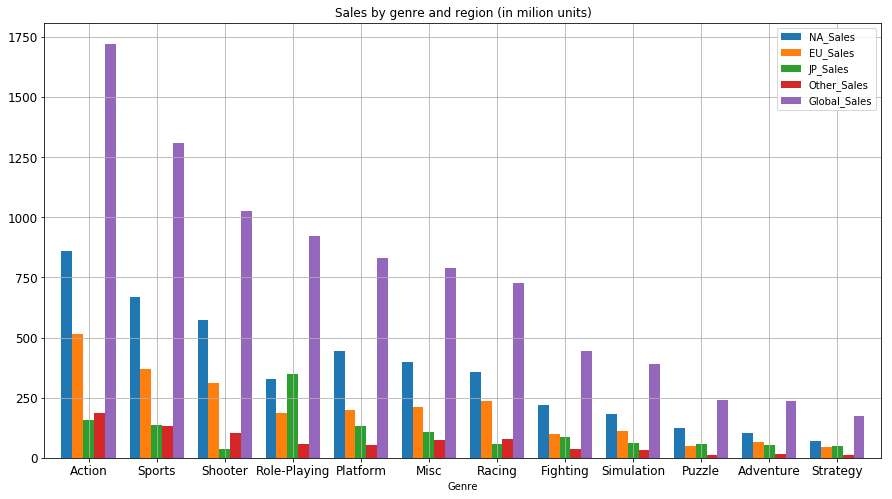

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In [14]:
# Sales by genre and region plot

regional = vg.groupby('Genre').sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1)
regional.plot(kind = 'bar', figsize = (15,8), rot= 0, fontsize = 12, grid= True, width=0.8)
plt.title('Sales by genre and region (in milion units)')
plt.show()
print()
regional

## Top 10 selling games by region

In [15]:
NA = vg.sort_values('NA_Sales',ascending = False).head(10)
EU = vg.sort_values('EU_Sales',ascending = False).head(10)
JP = vg.sort_values('JP_Sales',ascending = False).head(10)
Other = vg.sort_values('Other_Sales',ascending = False).head(10)
Global = vg.sort_values('Global_Sales',ascending = False).head(10)

#top10 = pd.concat([NA,EU,JP,Other,Global], axis = 0, ignore_index = True)

### North America

In [16]:
NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [17]:
NAg = NA.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='NA_Sales', ascending = False).reset_index()

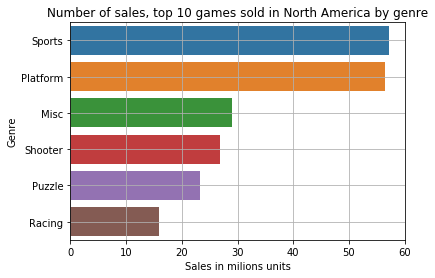

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,57.24,40.03,7.05,11.42,115.74
1,Platform,56.45,14.39,15.05,3.58,89.47
2,Misc,29.00,14.14,3.17,4.52,50.84
3,Shooter,26.93,0.63,0.28,0.47,28.31
4,Puzzle,23.20,2.26,4.22,0.58,30.26
5,Racing,15.85,12.88,3.79,3.31,35.82


In [18]:
sns.barplot(data=NAg, y='Genre',x='NA_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in North America by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
NAg

### Europe

In [19]:
EU

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [20]:
EUg = EU.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='EU_Sales', ascending = False).reset_index()

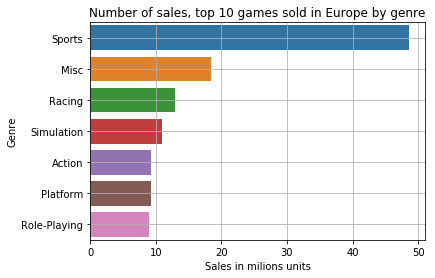

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,66.33,48.62,9.58,13.21,137.74
1,Misc,18.78,18.46,7.09,4.90,49.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Simulation,9.07,11.00,1.93,2.75,24.76
4,Action,7.01,9.27,0.97,4.14,21.40
5,Platform,11.38,9.23,6.50,2.90,30.01
6,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [21]:
sns.barplot(data=EUg, y='Genre',x='EU_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Europe by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
EUg

### Japan

In [22]:
JP

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


In [23]:
JPg = JP.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='JP_Sales', ascending = False).reset_index()

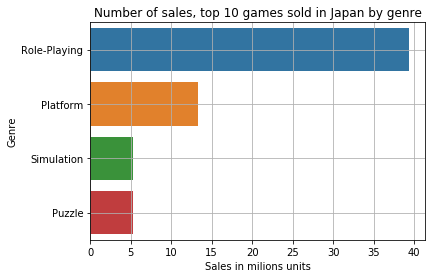

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Role-Playing,38.32,26.77,39.36,4.40,108.87
1,Platform,40.46,12.81,13.31,3.67,70.25
2,Simulation,2.55,3.52,5.33,0.88,12.27
3,Puzzle,3.44,5.36,5.32,1.18,15.30


In [24]:
sns.barplot(data=JPg, y='Genre',x='JP_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Japan by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
JPg

This kinda surprised me to be honest, each region has some preference over the others, let's take the Wii Sports as an exemple:
I remember when the Wii came out in '06, it was a huge hit, instant success all over the world, Except in Japan! it's homeland.

In fact, this shows how the japanese gamers prefer the portable platforms, like the DS, PSP and such. Other Japanese preference is the Pocket Monsters, Pokemon dominates the top 10 listing in Japan, and score a 5th place in most sold game worldwide.

### Other Regions

In [25]:
Other

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [26]:
Otherg = Other.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='Other_Sales', ascending = False).reset_index()

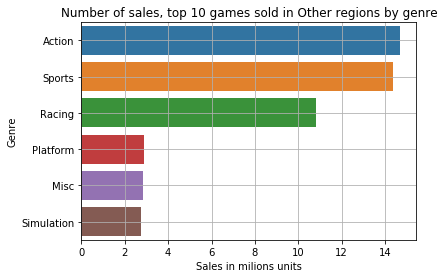

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16.44,9.67,1.38,14.71,42.21
1,Sports,57.29,40.03,7.69,14.35,119.37
2,Racing,18.86,12.89,4.89,10.84,47.48
3,Platform,11.38,9.23,6.50,2.90,30.01
4,Misc,14.03,9.20,2.93,2.85,29.02
5,Simulation,9.07,11.00,1.93,2.75,24.76


In [27]:
sns.barplot(data=Otherg, y='Genre',x='Other_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold in Other regions by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
Otherg

### Global Sales

In [28]:
Global

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [29]:
Globalg = Global.groupby('Genre').sum().drop(['Rank','Year'], axis = 1).sort_values(by='Global_Sales', ascending = False).reset_index()

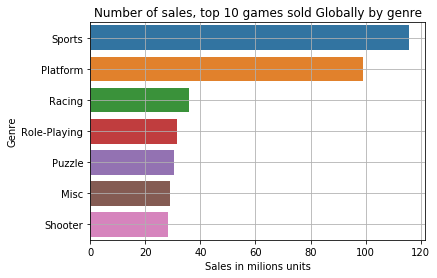

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,57.24,40.03,7.05,11.42,115.74
1,Platform,55.05,19.87,18.01,5.93,98.87
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Role-Playing,11.27,8.89,10.22,1.00,31.37
4,Puzzle,23.20,2.26,4.22,0.58,30.26
5,Misc,14.03,9.20,2.93,2.85,29.02
6,Shooter,26.93,0.63,0.28,0.47,28.31


In [30]:
sns.barplot(data=Globalg, y='Genre',x='Global_Sales')
plt.grid(axis='both',which='major')
plt.title('Number of sales, top 10 games sold Globally by genre')
plt.xlabel('Sales in milions units')
plt.show()
print()
Globalg

Overall we can see that each region has their preferences in game genres and platforms  [as we can see in this plot ](#SalesGenreOverview) based on that info. we can already select some genres and regions to either make a deeper study, or analisys to take the decision of developing or not a new title with certain genre and target region

## Number of sales by Publisher

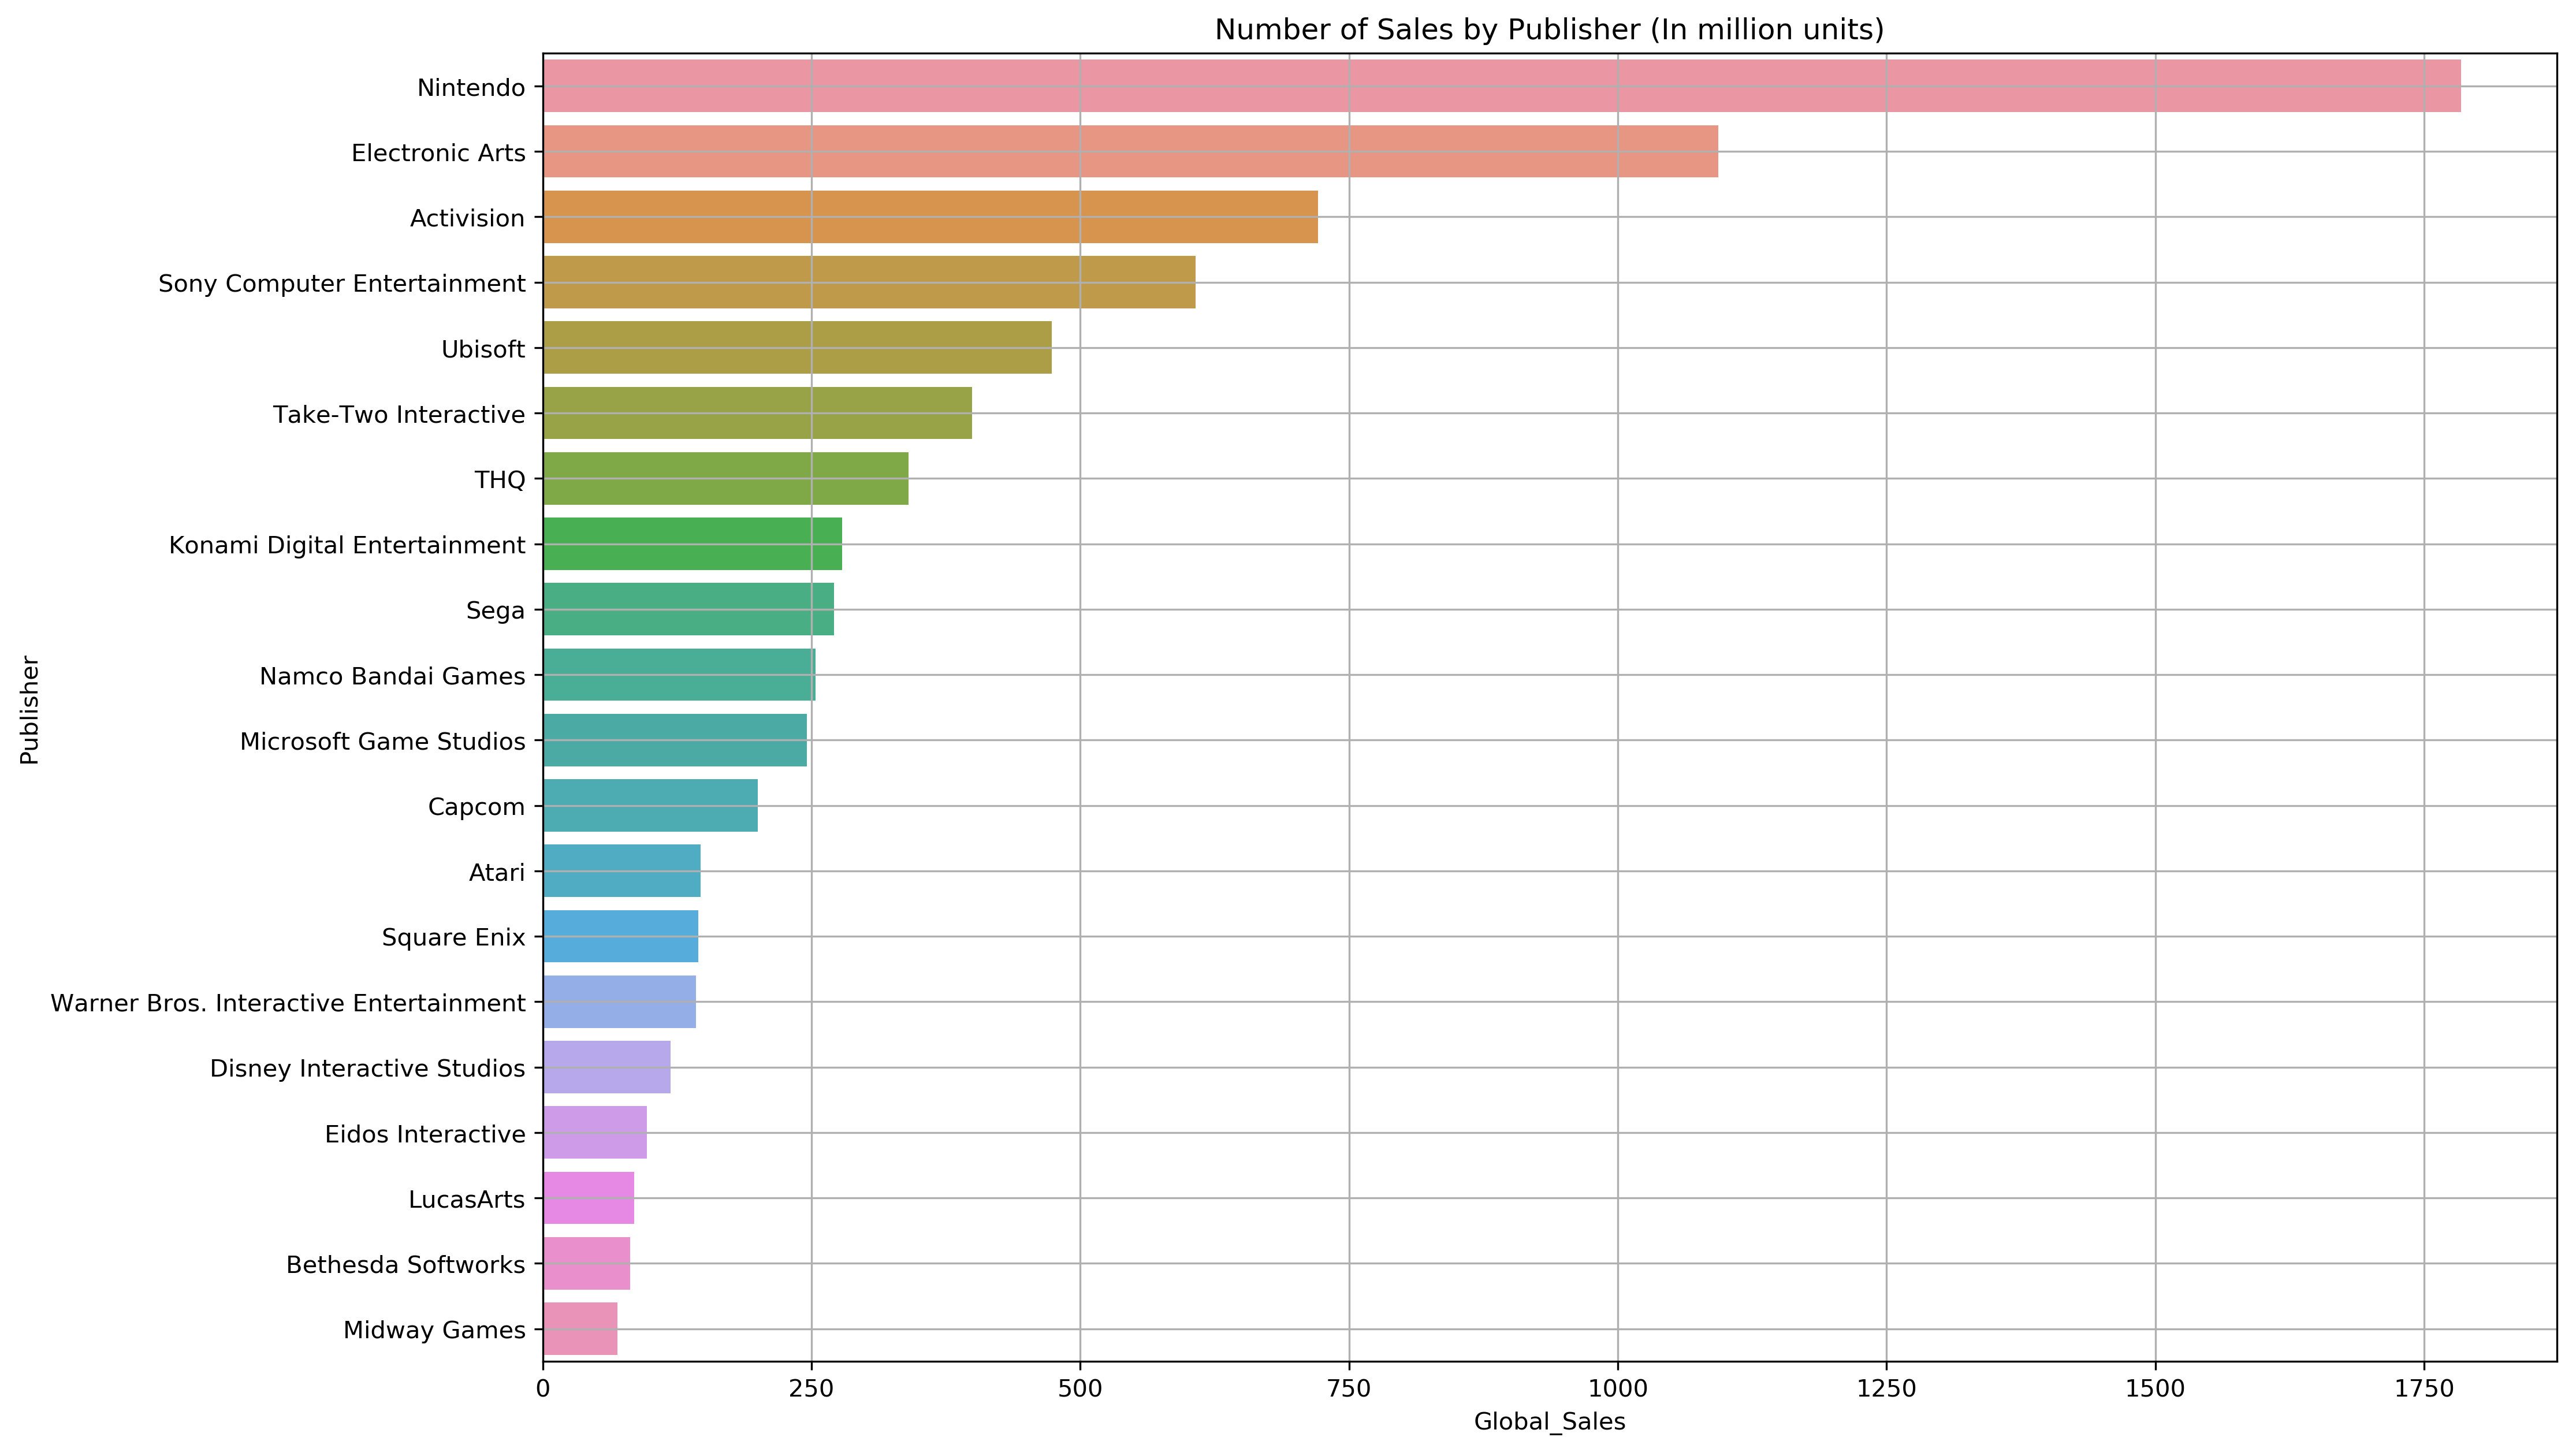

In [31]:
pub = vg.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1)

f = plt.figure(figsize=(15, 10),dpi = 300)
sns.barplot(data= pub.reset_index().head(20), x= 'Global_Sales', y='Publisher')
plt.grid(axis='both')
plt.title('Number of Sales by Publisher (In million units)')
plt.show()

Well, Nintendo is'nt called 'Big N' for nothing as we can clearly see in the above plot

## Number of sales by Publisher and region

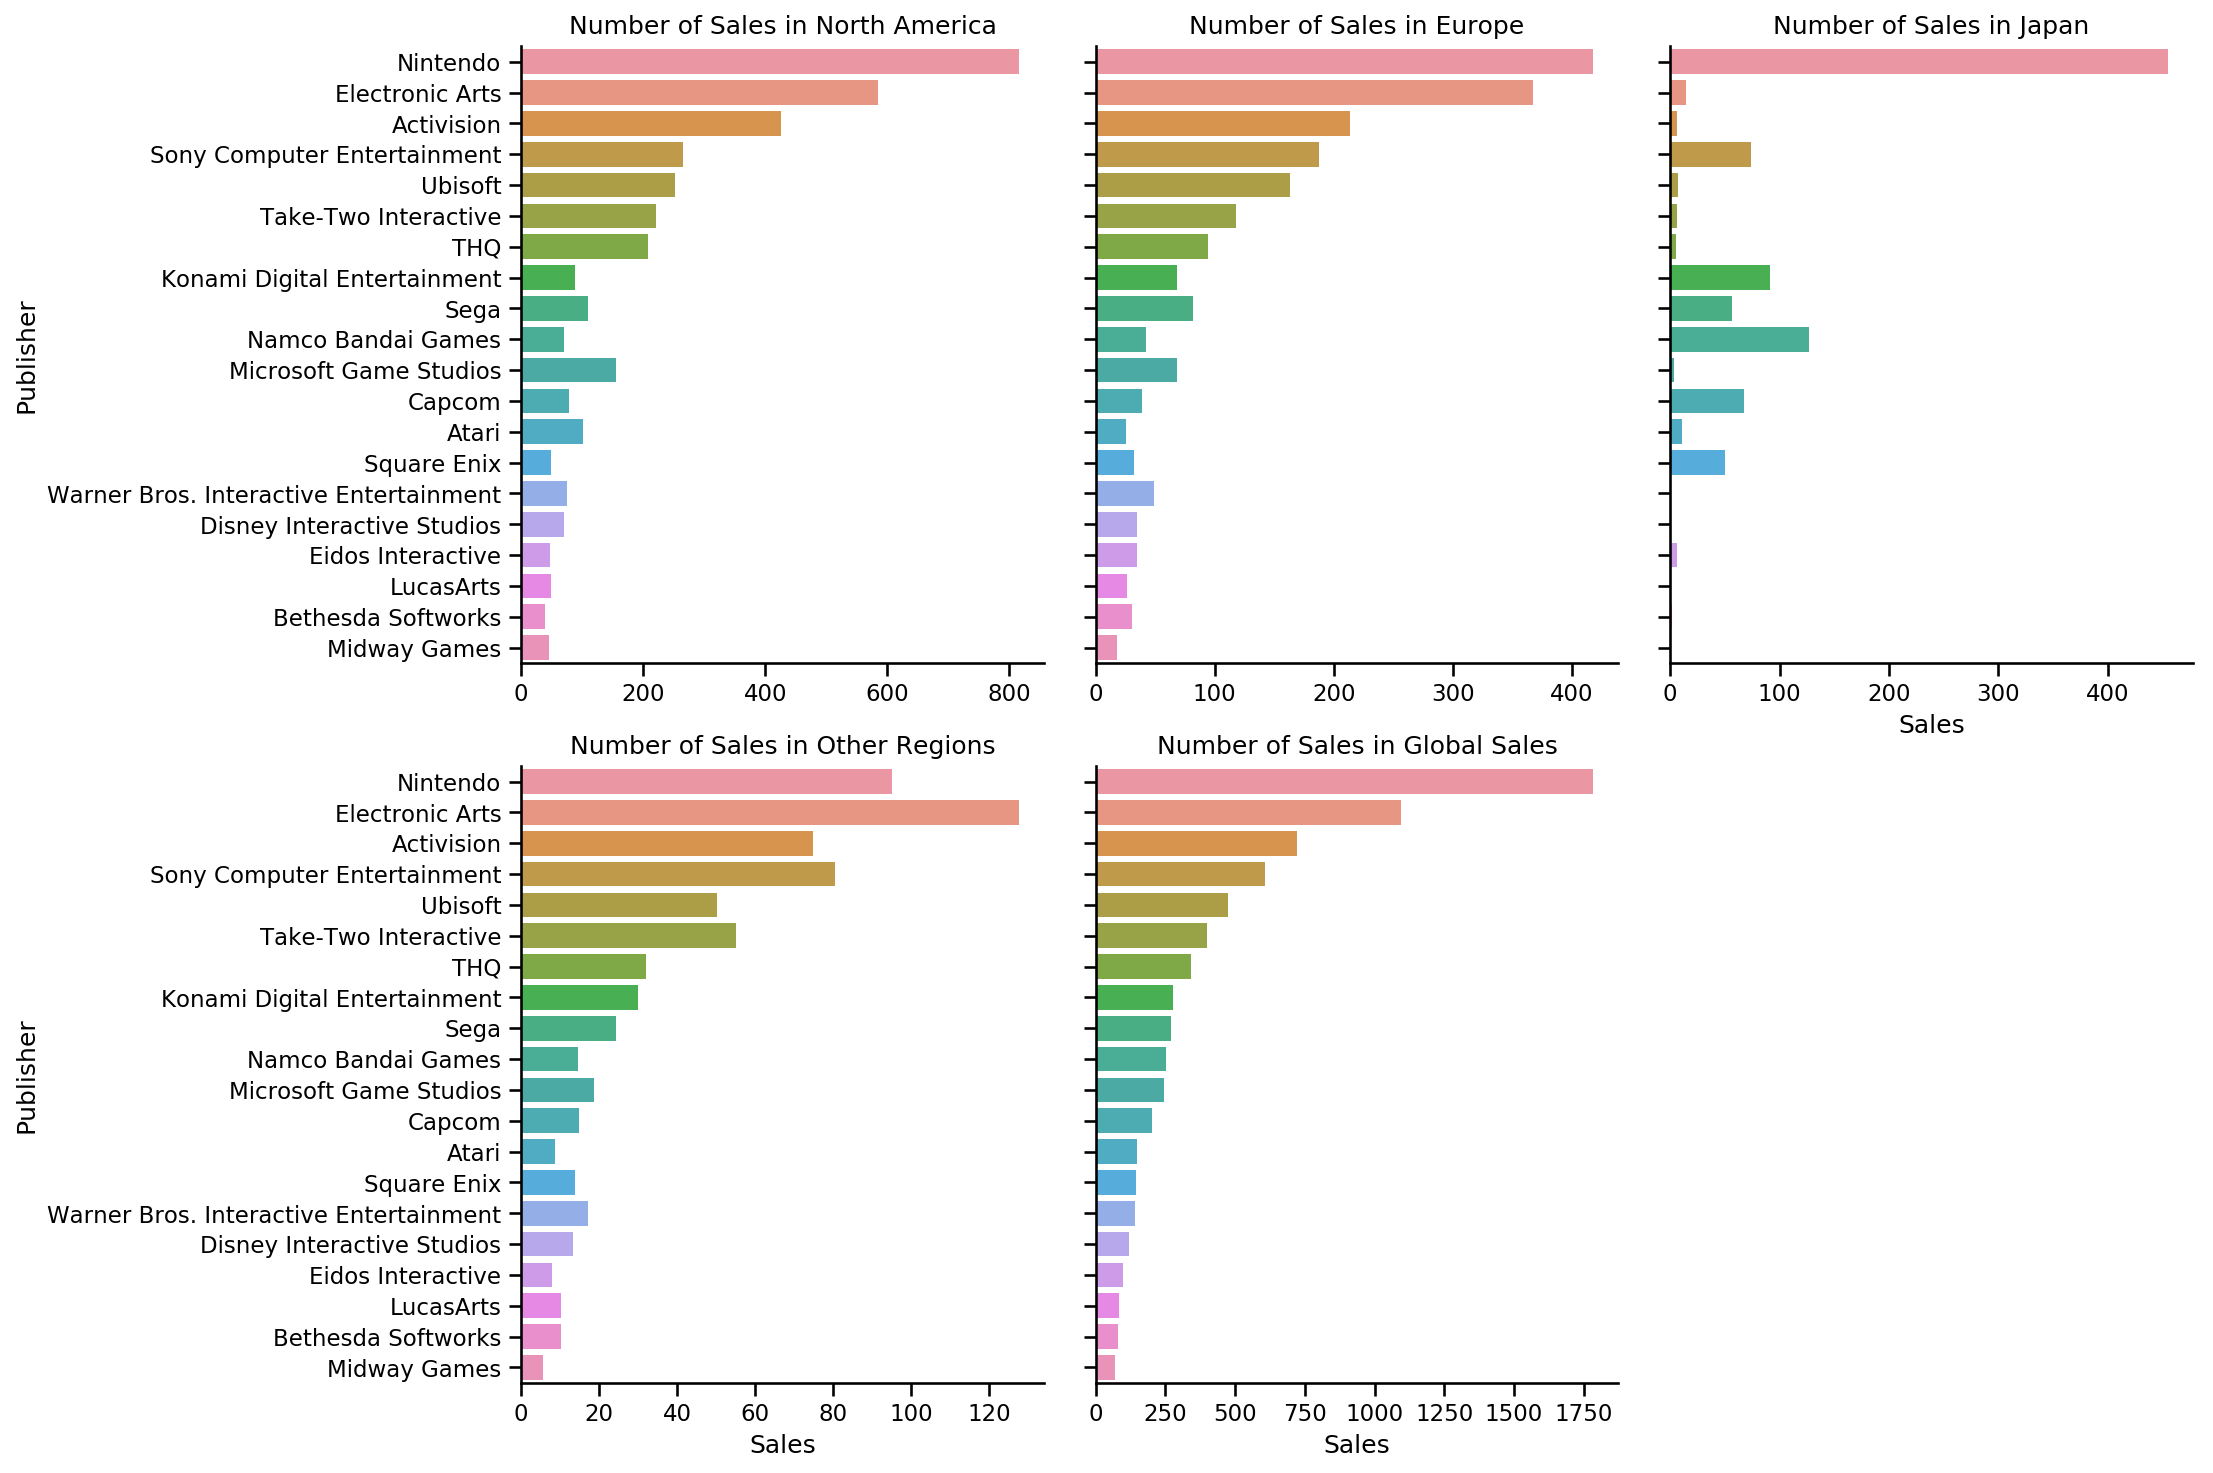

In [32]:
# 'massaging' the data to generate the plot below
pub2 = pub.sort_values('Global_Sales', ascending = False).reset_index().head(20).melt(
    id_vars='Publisher', value_vars=pub.columns, var_name= 'Region',value_name='Sales')

# Replacing the region tags
pub2.Region.replace(to_replace='NA_Sales',value='North America',inplace=True)
pub2.Region.replace(to_replace='EU_Sales',value='Europe',inplace=True)
pub2.Region.replace(to_replace='JP_Sales',value='Japan',inplace=True)
pub2.Region.replace(to_replace='Other_Sales',value='Other Regions',inplace=True)
pub2.Region.replace(to_replace='Global_Sales',value='Global Sales',inplace=True)

# Generating the plot
with sns.plotting_context('notebook'):    
    c = sns.catplot(data= pub2, y='Publisher', x='Sales', col='Region', col_wrap = 3, kind='bar',sharex=False,)
    c.fig.set_dpi(150)
    c.set_titles('Number of Sales in {col_name}')


## Best genre by publisher

Each publisher has its strong genres, like Nintendo does really good with Platform, Capcom with Fighting and so on. This is kinda common knowledge, but let's check properly with the data available

In [33]:
#Wrangling the data to plot the info
GenPub = vg.groupby(['Publisher','Genre']).sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1).reset_index()

GenPub.rename({'NA_Sales':'North America','EU_Sales':'Europe','JP_Sales':'Japan','Other_Sales':'Other Regions','Global_Sales':'Global'},
              axis= 'columns', inplace= True)

GenPub.groupby(['Publisher','Genre'],as_index=False).sum().sort_values('Global', ascending = False, inplace = True)

GenPub = GenPub.melt(id_vars=['Publisher','Genre'], var_name='Region', value_name='Sales')

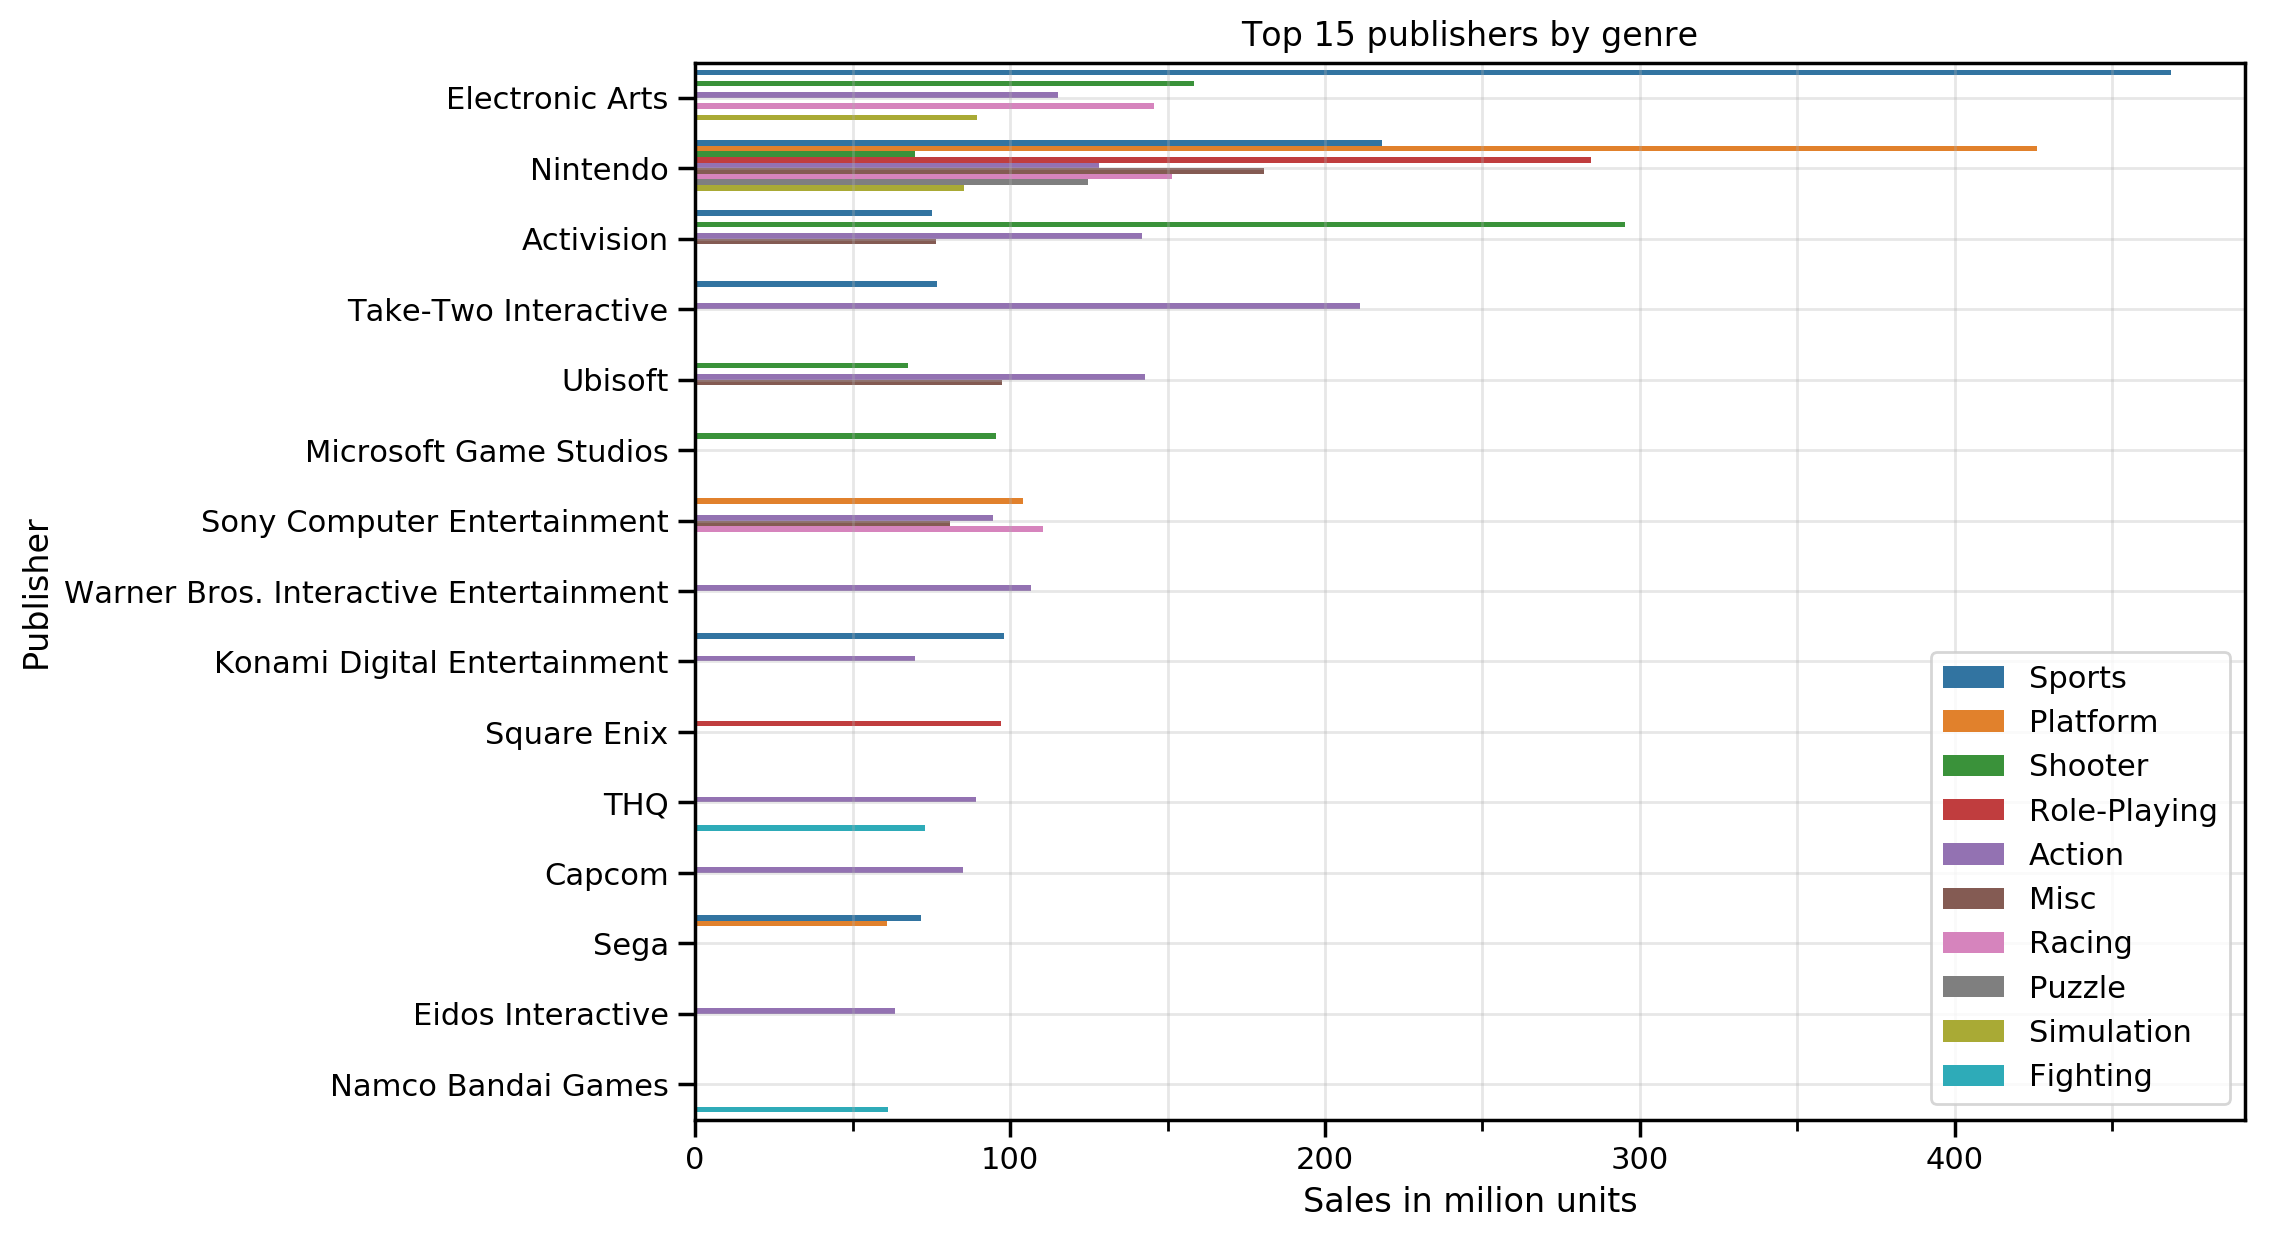

In [34]:
# Top 10 Publishers by genre
sns.set_context('notebook')

f, ax = plt.subplots(figsize=(10, 7),dpi = 200,)
f = sns.barplot(data= GenPub.loc[GenPub.Sales >= 60], x='Sales', y='Publisher', hue='Genre', estimator=max, errwidth=0) 
ax.set_xticks([50,150,250,350,450],minor=True)
plt.legend(loc=4)
plt.title('Top 15 publishers by genre')
plt.xlabel('Sales in milion units')
plt.grid(which='both', axis='both', alpha=0.3)

# Overlay dots at the bars
#sns.stripplot(data= GenPub.loc[GenPub.Sales >= 60], x='Sales', y='Publisher', hue='Genre', ax=ax, dodge = True)


## Most sold games
The videogame industry has come a long way, and in it's history, some games became classics, selling milions of copies worldwide.
Let's check the top selling game of the year

In [35]:
# Gathering the data
msold = vg.groupby(['Year','Name','Platform'], axis= 0, as_index=True).sum().sort_values(by=['Global_Sales'], ascending=False)#.reset_index()
msold.head()

,,,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,Name,Platform,,,,,,
2006,Wii Sports,Wii,1,41.49,29.02,3.77,8.46,82.74
1985,Super Mario Bros.,NES,2,29.08,3.58,6.81,0.77,40.24
2008,Mario Kart Wii,Wii,3,15.85,12.88,3.79,3.31,35.82
2009,Wii Sports Resort,Wii,4,15.75,11.01,3.28,2.96,33.00
1996,Pokemon Red/Pokemon Blue,GB,5,11.27,8.89,10.22,1.00,31.37


In [36]:
# Rearanging the data
msold1 = msold.sort_values(by='Year',kind='mergesort').reset_index()
msold1.head()

,Year,Name,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Asteroids,2600,259,4.00,0.26,0.0,0.05,4.31
1,1980,Missile Command,2600,545,2.56,0.17,0.0,0.03,2.76
2,1980,Kaboom!,2600,1768,1.07,0.07,0.0,0.01,1.15
3,1980,Defender,2600,1971,0.99,0.05,0.0,0.01,1.05
4,1980,Boxing,2600,2671,0.72,0.04,0.0,0.01,0.77


Now that we got the games sorted by year and most sold game, i wanted to pick just the most sold game for every year. Since that for every year the first row is the most sold game, the line below solved my problem

In [37]:
msold1.loc[msold1.Year == 1981].head(1)

,Year,Name,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,1981,Pitfall!,2600,240,4.21,0.24,0.0,0.05,4.5


Threw it in a For loop, and got the result that i wanted

In [38]:
ano = 1980
most_sold = pd.DataFrame()
for val in msold1.iterrows():
    most_sold = msold1.loc[msold1.Year == ano].head(1).append(most_sold)
    #print(x)
    ano+= 1
    val = ano
    if (ano == 2017):
        break

In [39]:
# Most sold games by year
most_sold.sort_values(by='Year',ascending = True)

,Year,Name,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Asteroids,2600,259,4.00,0.26,0.00,0.05,4.31
9,1981,Pitfall!,2600,240,4.21,0.24,0.00,0.05,4.50
55,1982,Pac-Man,2600,90,7.28,0.45,0.00,0.08,7.81
91,1983,Baseball,NES,422,0.73,0.10,2.35,0.02,3.20
108,1984,Duck Hunt,NES,10,26.93,0.63,0.28,0.47,28.31
122,1985,Super Mario Bros.,NES,2,29.08,3.58,6.81,0.77,40.24
136,1986,The Legend of Zelda,NES,128,3.74,0.93,1.69,0.14,6.51
157,1987,Zelda II: The Adventure of Link,NES,252,2.19,0.50,1.61,0.08,4.38
173,1988,Super Mario Bros. 3,NES,23,9.54,3.44,3.84,0.46,17.28
188,1989,Tetris,GB,6,23.20,2.26,4.22,0.58,30.26


### Games sales by year

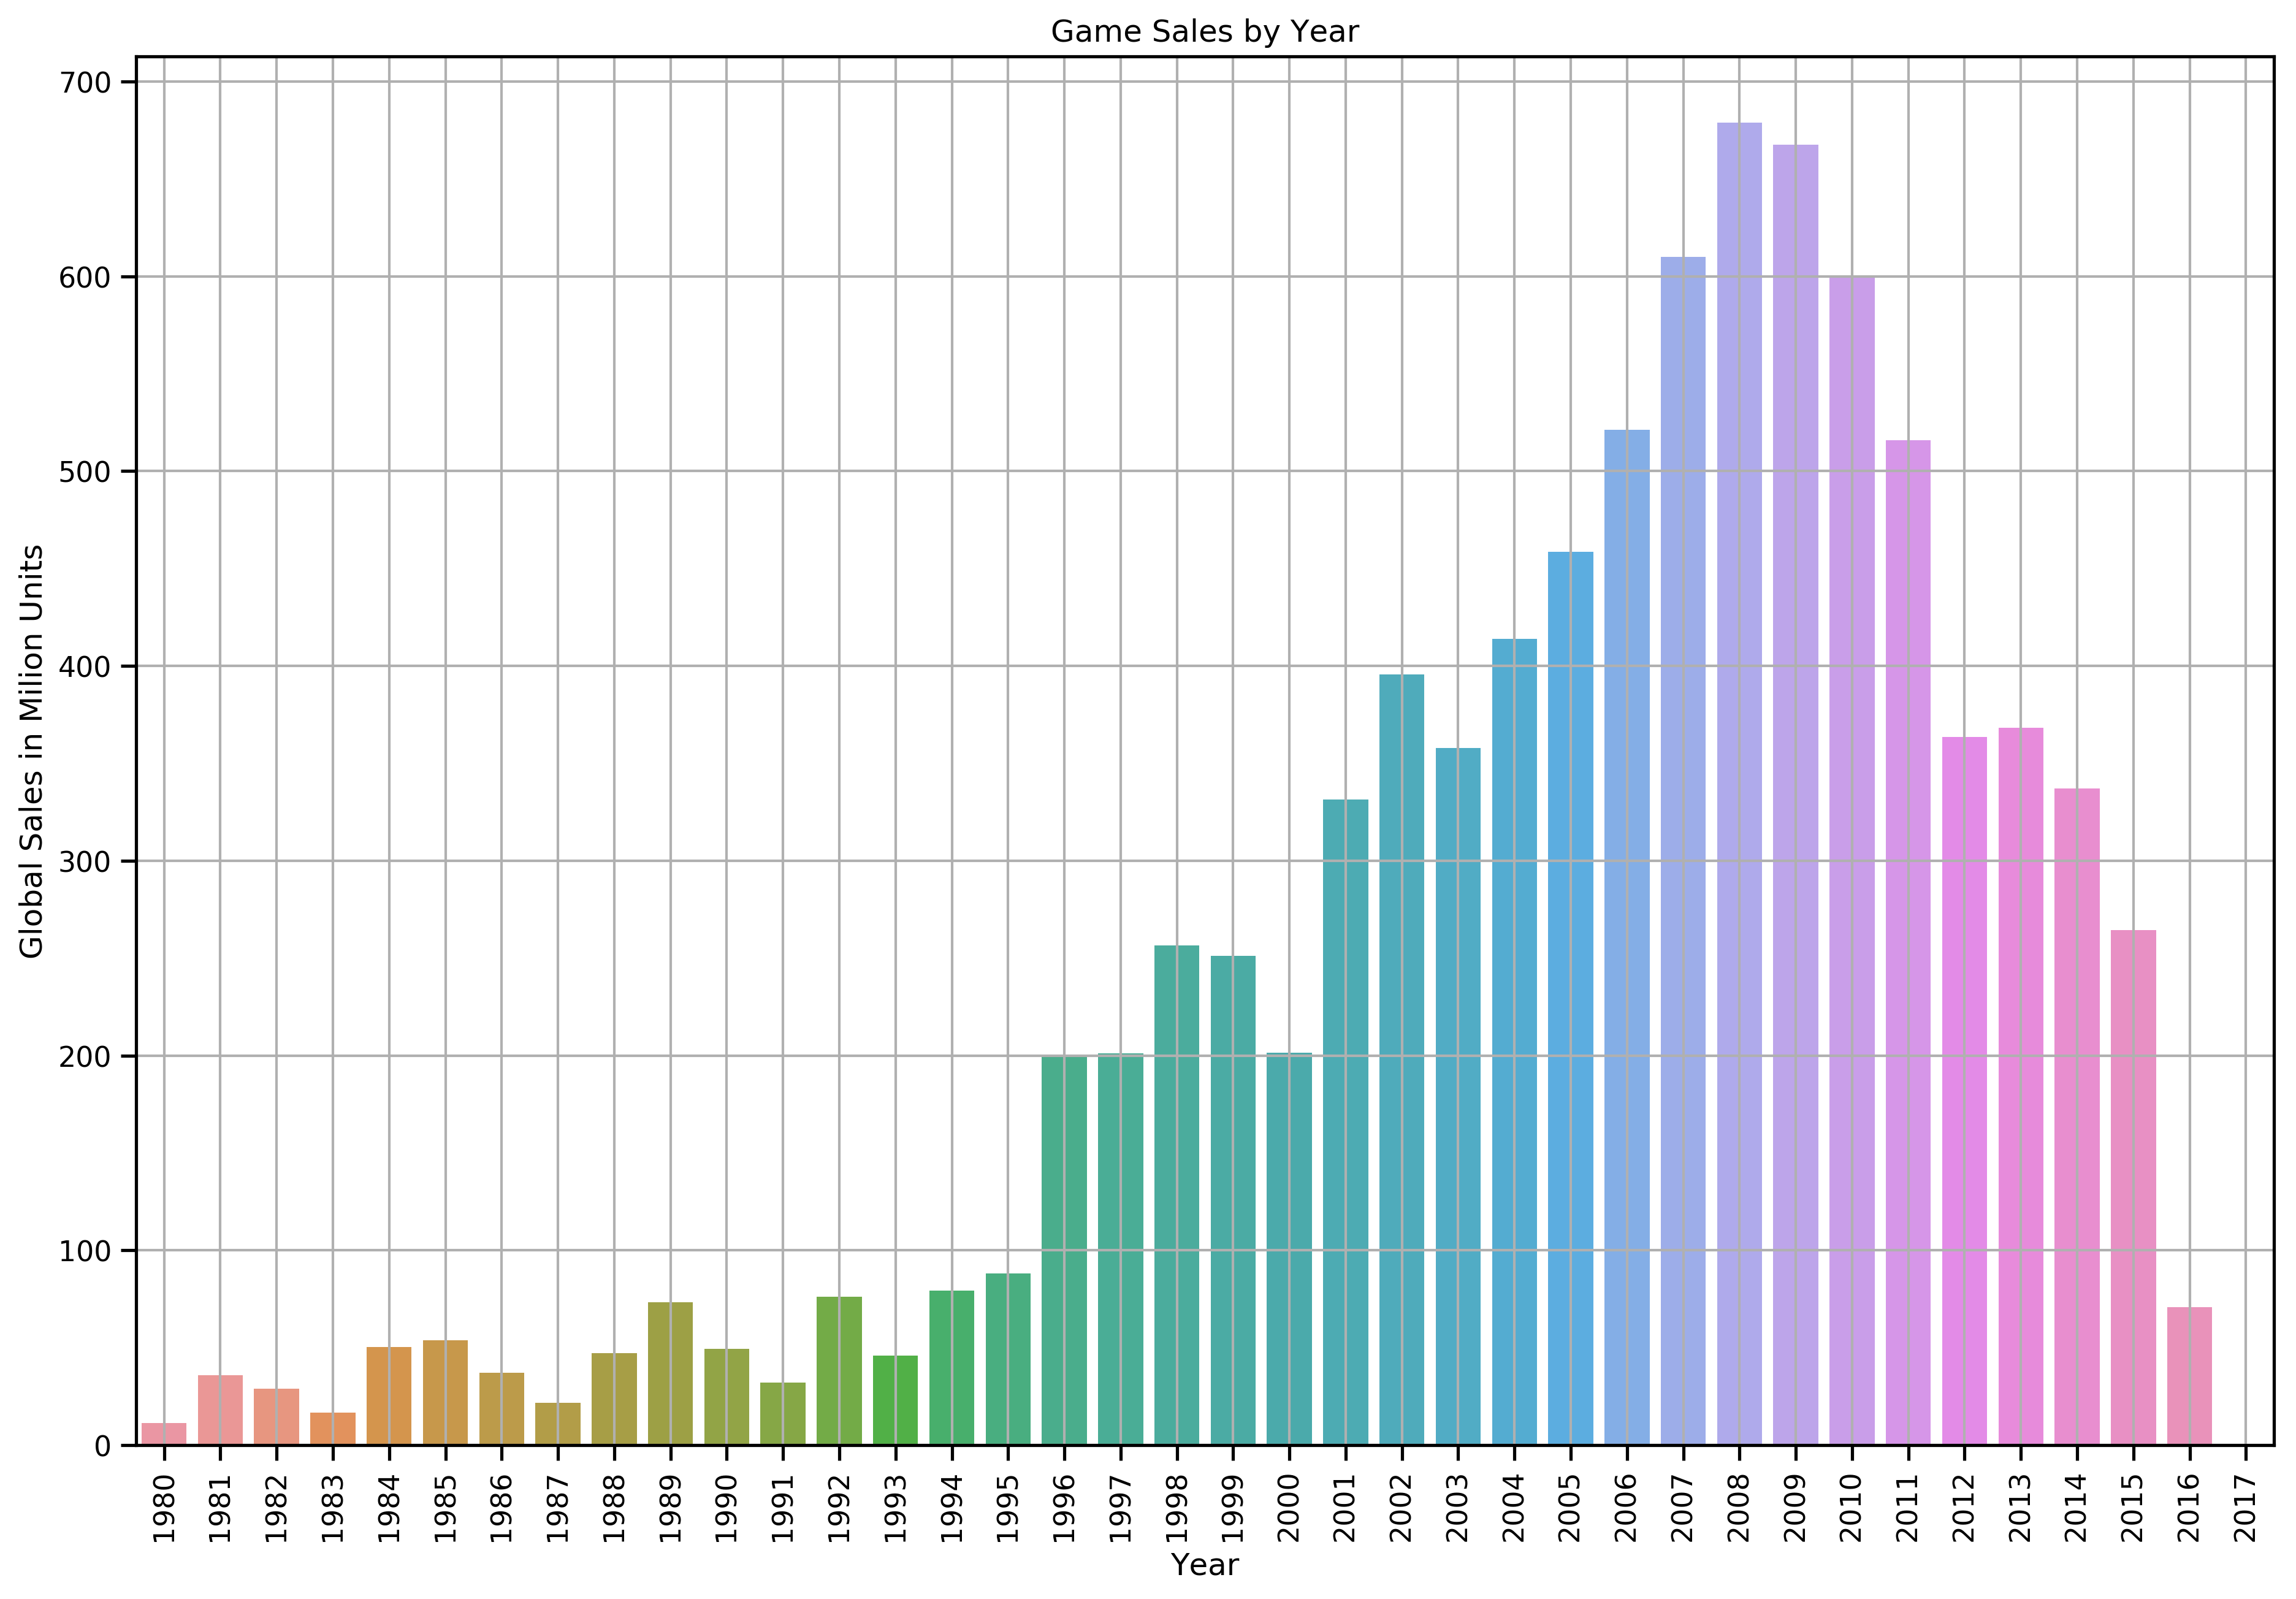

In [40]:
sby = vg.groupby('Year').sum().drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1).reset_index()
f = plt.figure(figsize=(15, 10),dpi = 300)
sns.barplot(data=sby,y='Global_Sales', x='Year', estimator = max)
plt.xticks(rotation=90)
plt.ylabel('Global Sales in Milion Units')
plt.title('Game Sales by Year')
plt.grid(axis='both')
plt.show()

### Most sold genres by year

In [41]:
# Gathering the data and ordering by Year and global sales

gby = vg.groupby(['Year','Genre'], as_index= False).sum().drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
gby.sort_values(by=['Year','Global_Sales'], ascending=[True,False], inplace= True)

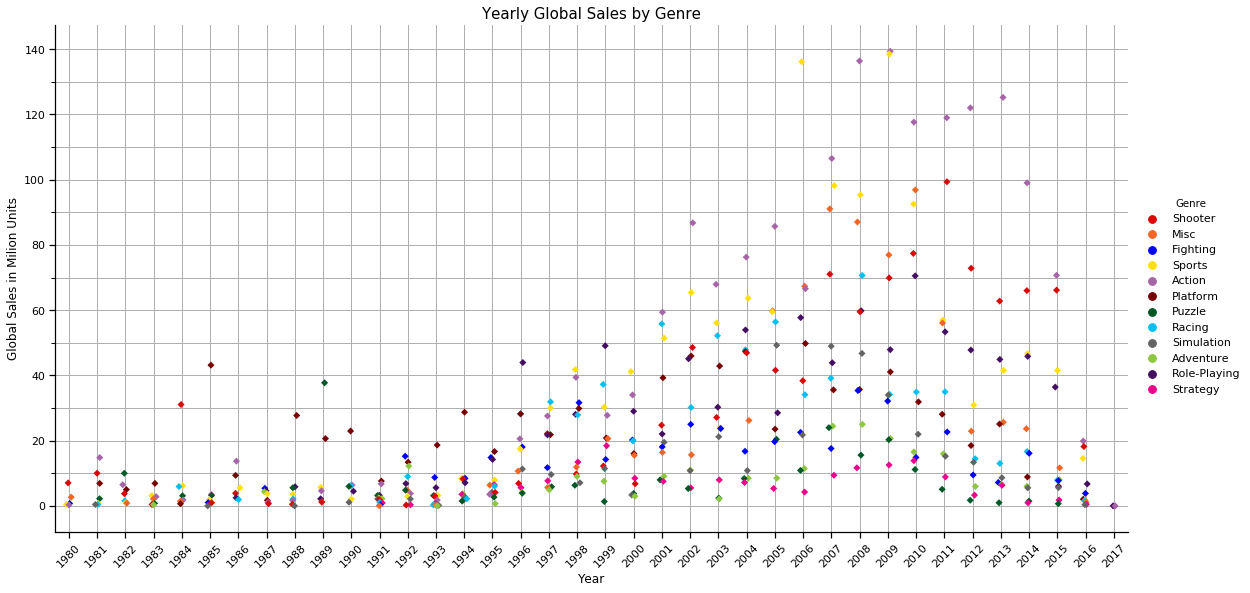

In [42]:
# This is kinda hard to see, but i think its the best plot that i could came up with, 
#please feel free to modify and represent the information in some other way!

f = sns.catplot(data=gby, y='Global_Sales', x='Year', hue = 'Genre', orient='v', kind= 'strip', aspect=2, height=8, 
                dodge=False, marker='D', palette=clrz)
plt.grid(axis='both',which='both')
plt.xticks(rotation=45)
f.ax.set_yticks([10,30,50,70,90,110,130], minor=True)
plt.ylabel('Global Sales in Milion Units')
plt.title('Yearly Global Sales by Genre', fontdict={'fontsize':15})
plt.show()

### Top 6 consoles (marketshare)

OK, so to acurately represent this we would need actual console sales numbers. But since this data is lacking, let's assume that for every game sold, one console was sold too

First lets check the overall most sold consoles, and than the consoles from the last gen and portables

In [43]:
# 6 Most sold consoles overall
cons = vg.groupby(['Platform'], as_index=False).sum().drop(['Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1).sort_values('Global_Sales', ascending=False).head(6)
cons

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39


In [44]:
# 7th and 8th gen consoles
cons2 = vg.groupby(['Platform'], as_index=False).sum().drop(['Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1).sort_values('Global_Sales', ascending=False)

cons2.loc[(cons2.Platform == 'X360') | (cons2.Platform == 'PS3') | (cons2.Platform == 'Wii') | 
         (cons2.Platform == 'PS4') | (cons2.Platform == 'XOne') | (cons2.Platform == 'WiiU') | (cons2.Platform == 'DS') |
        (cons2.Platform == 'PSP') | (cons2.Platform == '3DS') | (cons2.Platform == 'PSV')]

,Platform,Global_Sales
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
19,PSP,291.71
18,PS4,278.10
2,3DS,246.27
30,XOne,141.06
27,WiiU,81.86
20,PSV,61.60


Now that we got the 12 most sold consoles (in our analysis), let's see their sales performance over the years. The oldest platform in this case is the OG Play Station that came out in 1994, so we'll look from '94 to '17

In [45]:
temp = vg.groupby(['Platform','Year'], as_index= False).sum().drop('Rank', axis=1)

In [46]:
cons12 = temp.loc[(temp.Platform == 'PS') | (temp.Platform == 'PS2') | (temp.Platform == 'PS3') | (temp.Platform == 'PS4') | 
        (temp.Platform == 'X360') | (temp.Platform == 'XOne') | (temp.Platform == 'Wii') | (temp.Platform == 'WiiU') | 
        (temp.Platform == 'DS') | (temp.Platform == 'PSP') | (temp.Platform == '3DS') | (temp.Platform == 'PSV')]

When i ploted the graph the 1st time, i noticed something funny going on with the years displayed in the plot. It had a random '1985' somewhere, and here is how i tracked it down

In [47]:
cons12.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2009.273585,30.153396,18.463962,7.864245,6.795660,63.293585
std,5.790852,31.517574,18.572611,8.804212,7.413042,60.624975
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,2006.000000,3.662500,3.052500,1.085000,1.005000,11.785000
50%,2011.000000,15.585000,10.780000,4.135000,3.915000,39.180000
75%,2014.000000,52.505000,33.725000,12.547500,10.910000,116.867500
max,2017.000000,116.540000,65.270000,38.560000,39.850000,211.780000


In [48]:
cons12.loc[cons12.Year == 1985]

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
25,DS,1985,0.0,0.0,0.02,0.0,0.02


In [49]:
cons12.loc[cons12.Platform == 'DS']

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
25,DS,1985,0.00,0.00,0.02,0.00,0.02
26,DS,2004,8.42,3.97,3.65,1.37,17.46
27,DS,2005,48.47,42.06,29.86,10.91,131.40
28,DS,2006,50.63,23.53,38.56,8.28,121.15
29,DS,2007,76.36,34.58,26.81,11.27,149.36
30,DS,2008,79.40,33.05,24.01,11.16,147.89
31,DS,2009,62.68,26.52,24.21,8.75,122.28
32,DS,2010,42.36,20.07,19.86,5.73,87.98
33,DS,2011,15.29,6.18,4.32,2.02,27.80
34,DS,2012,4.18,3.02,3.72,0.63,11.59


I'm not a big fan of simply deleting stuff from the Dataset, so i'll just add that 0.02 from the wrong 1985 to 2014

In [50]:
cons12.loc[(cons12['Platform'] == 'DS') & (cons12['Year'] == 1985)]

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
25,DS,1985,0.0,0.0,0.02,0.0,0.02


In [51]:
cons12.loc[(cons12['Platform'] == 'DS') & (cons12['Year'] == 2014)]

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
36,DS,2014,0.02,0.0,0.0,0.0,0.02


The warnings below i find interesting to leave in because they taught me how to get to specific values in the dataset and change certain values.

I was trying to use the .loc method to select the specific values that i wanted to than change it, but it wasn't working, because mainly the .loc method returns a 'view' of that data, not the actual data itself so it throws a warning and does nothing.

Than i tried with the .iloc method and it took me a while but i figured it out reading the documentation available at the link shown by the warning.
it's under the section: 'Why does assignment fail when using chained indexing?' and really worth the reading

In [52]:
# Acessing the 2014 register of the DS platform, through the slice 17:18, and then on the 4th column, assigning the 0.02 value
cons12.iloc[17:18,(4)] = 0.02

D:\Programas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
# Acessing the 2014 register of the DS platform, through the slice 17:18, and then on the last column, updating the value to 0.04
cons12.iloc[17:18,(-1)] = 0.04

D:\Programas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
# Deleting the 1985 entry
cons12.drop(labels=25, axis=0, inplace= True)

# And on the last line, the updated values
cons12.head(17)

D:\Programas\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12,3DS,2011,26.98,18.42,12.80,4.38,62.53
13,3DS,2012,17.04,11.59,19.92,2.55,51.14
14,3DS,2013,15.33,14.34,23.52,2.67,55.88
15,3DS,2014,12.03,8.60,20.64,1.84,43.13
16,3DS,2015,5.82,4.77,15.39,0.99,26.99
17,3DS,2016,0.83,0.57,5.03,0.12,6.60
26,DS,2004,8.42,3.97,3.65,1.37,17.46
27,DS,2005,48.47,42.06,29.86,10.91,131.40
28,DS,2006,50.63,23.53,38.56,8.28,121.15
29,DS,2007,76.36,34.58,26.81,11.27,149.36


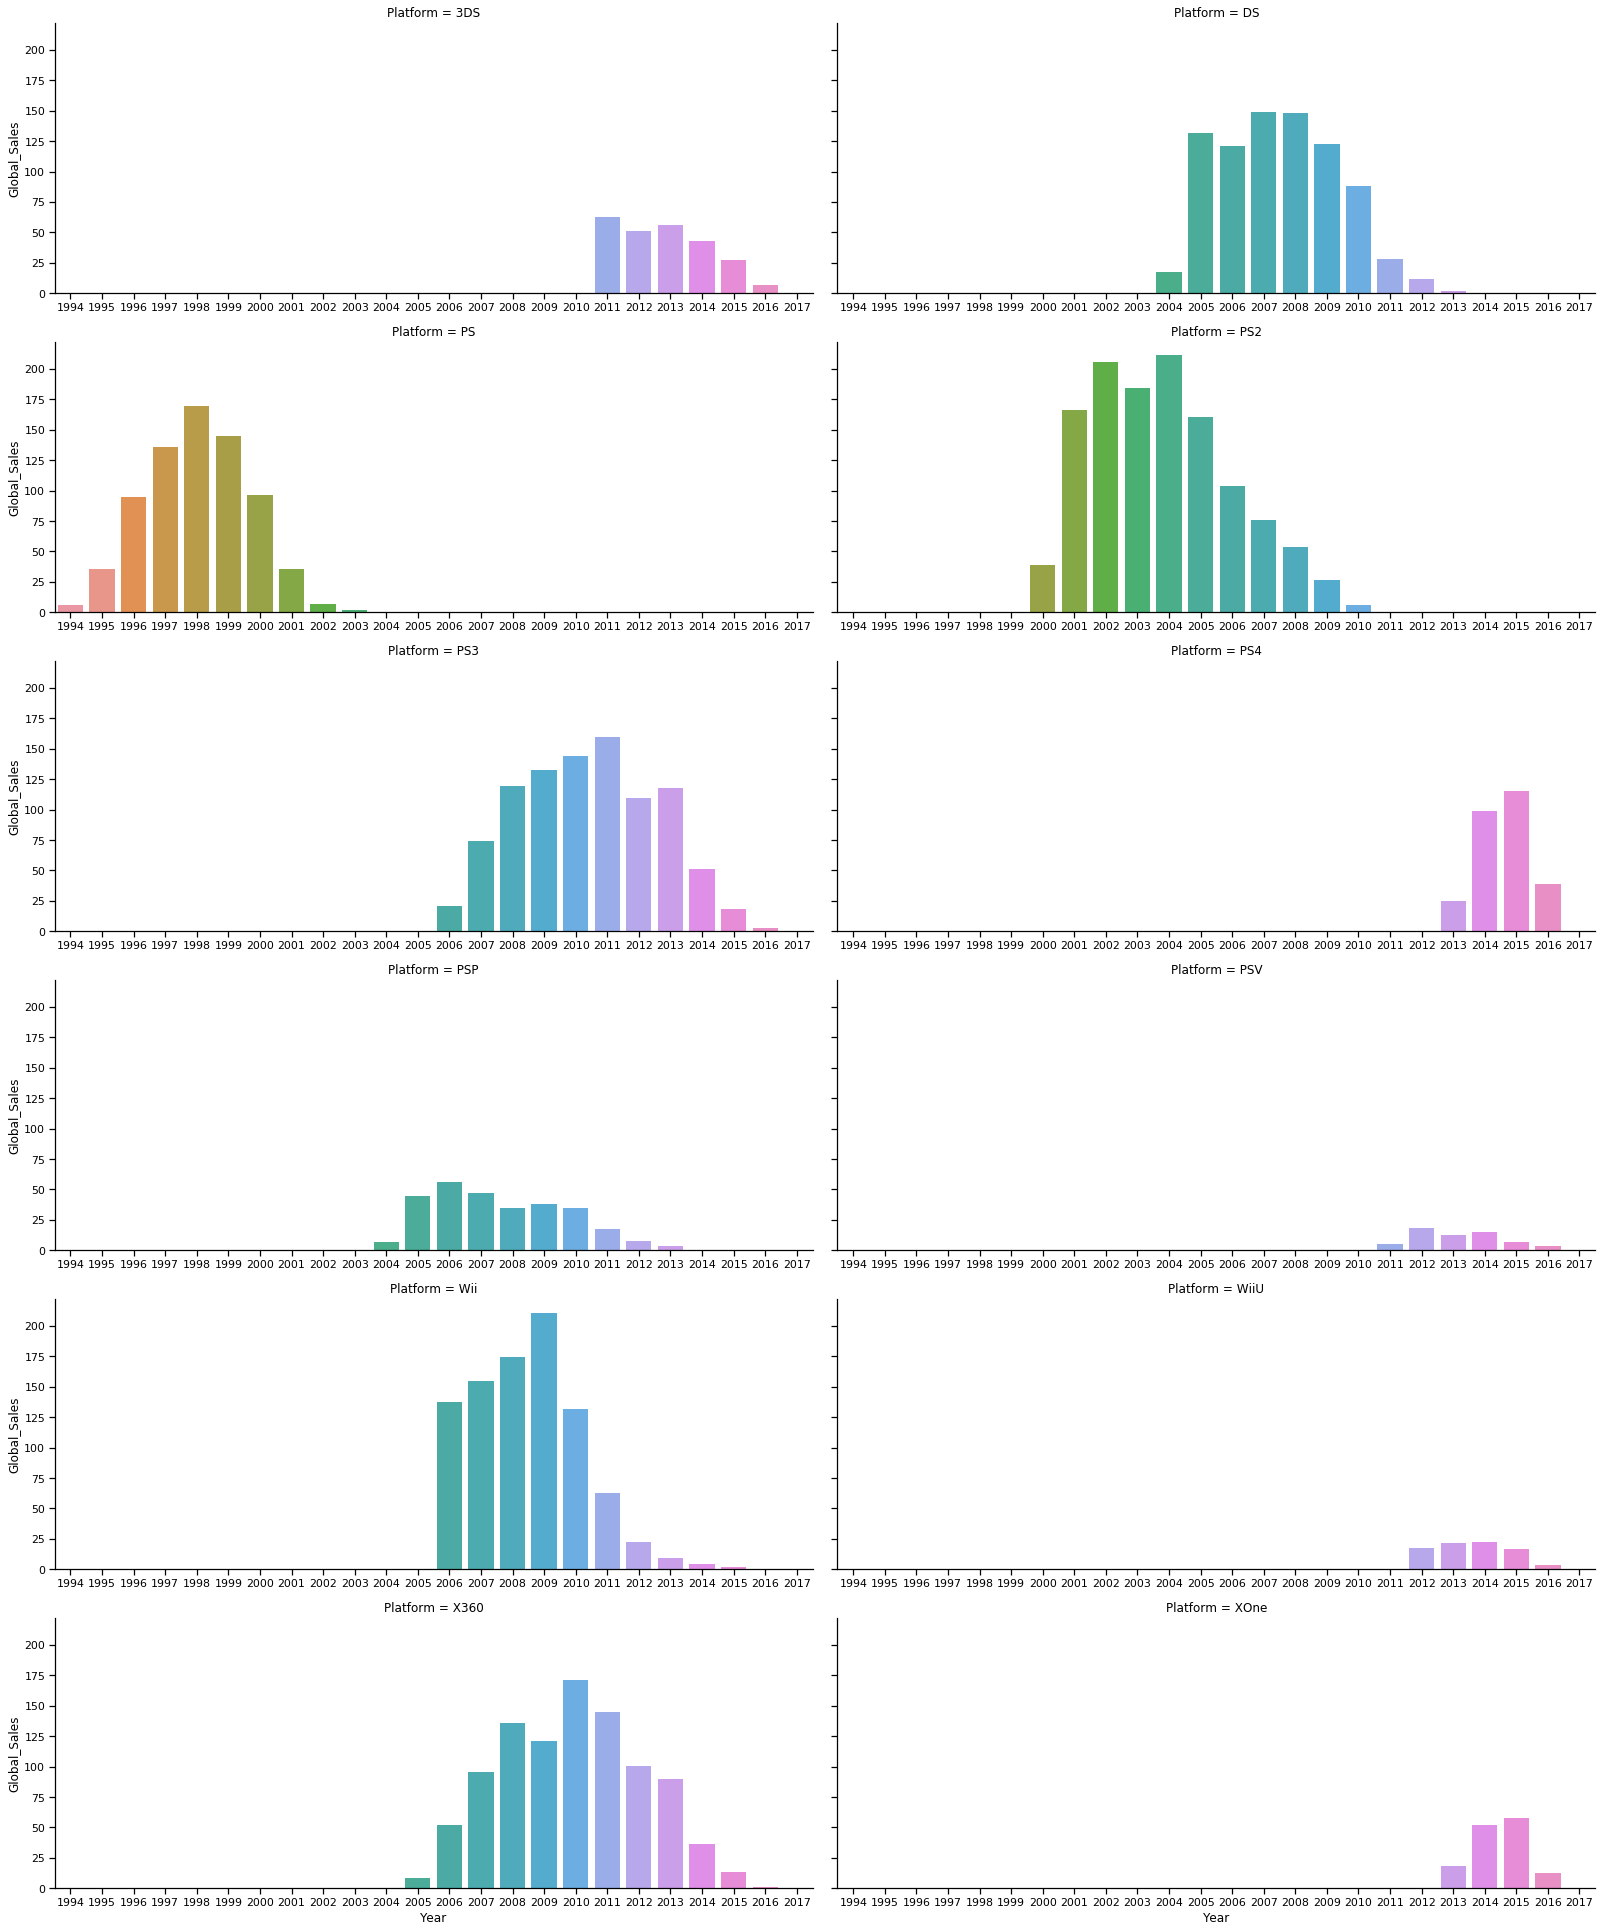

In [57]:
# Most sold consoles from 6th, 7th and 8th generations
g = sns.catplot(data= cons12, x='Year', y='Global_Sales', col='Platform', col_wrap=2, kind='bar', 
            sharex=False, sharey= True, aspect= 2.5, height = 4.5, estimator= max)
#g.savefig(dpi=300,fname='D:\GitHub\Python\\Data Science Projects\\Video Game Sales\Sales_Platform.png')

### Running in the 90's

I was born in 1993, love racing games and cars from the 90's era. So lets take a look on the racing games from that era

In [56]:
race = vg.loc[(vg.Genre == 'Racing') & (vg.Year < 2000) & (vg.Year > 1989)]
race.reset_index(inplace=True, drop=True)
race

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
1,64,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
2,70,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
3,77,Super Mario Kart,SNES,1992,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76
4,214,Diddy Kong Racing,N64,1997,Racing,Nintendo,2.91,0.99,0.89,0.10,4.88
5,221,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2.57,1.57,0.44,0.21,4.79
6,392,F-1 Race,GB,1990,Racing,Nintendo,1.73,0.69,0.59,0.40,3.41
7,443,Need for Speed III: Hot Pursuit,PS,1998,Racing,Electronic Arts,2.14,0.86,0.00,0.13,3.12
8,444,Star Wars Episode I Racer,N64,1999,Racing,Nintendo,2.31,0.62,0.14,0.04,3.12
9,485,Wave Race 64,N64,1996,Racing,Nintendo,1.98,0.58,0.34,0.04,2.94


Didn't figured out what i want to know of the racing games yet, i guess that is to come on the next update of this notebook...

### To do list:
- Most sold game, 1990 to 2017 [OK]
- Games sales by year [OK]
- Genre sales by year [OK]
- Console marketshare (top 6) [OK]
- Running in the 90's - Racing games from 1990 (maybe)

- Word clouds:
-- Games
-- Publisher

#### Idea to try:
ML model to forecast sales given: Publisher, Genre, Region (choosable via dropdown list)